In [7]:
import networkx as nx
import os
from SimulationHelper import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [5]:
## Multiprocessing Package - Speed up simulation
from multiprocessing import cpu_count
from dask.distributed import Client, progress
import dask
client = Client(threads_per_worker=8)
client

Client Scheduler: tcp://127.0.0.1:43071 Dashboard: http://127.0.0.1:39467/status,Cluster Workers: 2 Cores: 16 Memory: 33.60 GB


In [8]:
# Parameters
phis = np.arange(0.05, 0.31, 0.05)
qs = np.arange(0.05, 0.26, 0.05)
phi_fixed = 0.18
q_fixed = 0.1
names = ["Influential", "Normal"]

## Facebook

Influentials analysis for Facebook data.

In [4]:
facebook = nx.read_edgelist("Data/facebook.txt")
print(nx.info(facebook))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [5]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(facebook, phi=phi, q=q_fixed, directed=False))

results_facebook_phi = dask.compute(pool)

100%|██████████| 6/6 [00:00<00:00, 2600.85it/s]


CPU times: user 17.8 s, sys: 2.14 s, total: 19.9 s
Wall time: 4min 16s


In [6]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(facebook, phi=phi, q=q_fixed, directed=False))

results_facebook_q = dask.compute(pool)

100%|██████████| 6/6 [00:00<00:00, 1715.46it/s]


CPU times: user 17.6 s, sys: 2.23 s, total: 19.9 s
Wall time: 4min 20s


## Analysis



In [ ]:
## Preload Data
#file_dir = "./Results"
# fb_fn_phi = "facebook_phi.npy"
# fb_fn_q = "facebook_q.npy"
# fb_phi = np.load(os.path.join(file_dir, fb_fn_phi))
# fb_q = np.load(os.path.join(file_dir, fb_fn_q))

In [11]:
fb_phi = np.array(results_facebook_phi[0])
fb_q = np.array(results_facebook_q[0])

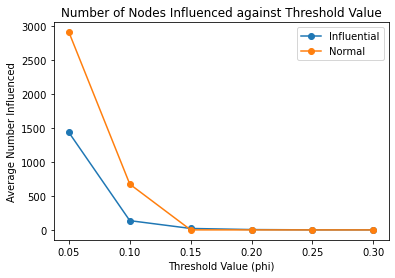

In [11]:
plt.plot(phis, fb_phi[:,0], "-o")
plt.plot(phis, fb_phi[:,1], "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Number of Nodes Influenced against Threshold Value")
plt.legend(names)

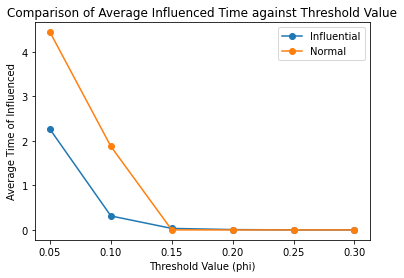

In [12]:
plt.plot(phis, fb_phi[:,2], "-o")
plt.plot(phis, fb_phi[:,3], "-o")
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Comparison of Average Influenced Time against Threshold Value")
plt.legend(names)

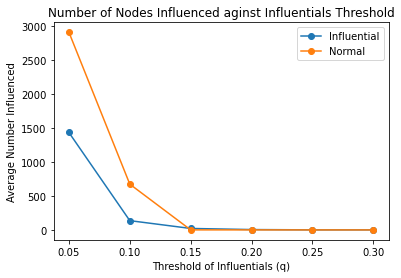

In [13]:
plt.plot(phis, fb_q[:,0], "-o")
plt.plot(phis, fb_q[:,1], "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold of Influentials (q)")
plt.title("Number of Nodes Influenced aginst Influentials Threshold")
plt.legend(names)

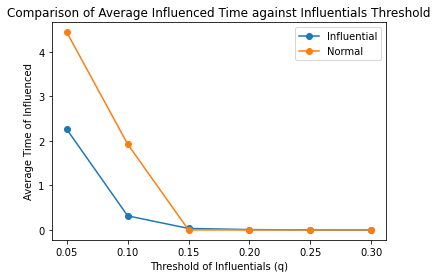

In [14]:
plt.plot(phis, fb_q[:,2], "-o")
plt.plot(phis, fb_q[:,3], "-o")
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold of Influentials (q)")
plt.title("Comparison of Average Influenced Time against Influentials Threshold")
plt.legend(names)

In [20]:
file_dir = "./Results"
fb_fn_phi = "facebook_phi.npy"
fb_fn_q = "facebook_q.npy"

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
np.save(os.path.join(file_dir, fb_fn_phi), fb_phi)
np.save(os.path.join(file_dir, fb_fn_q), fb_q)

## Twitter
Influentials analysis for Twitter data.

In [15]:
twitter = nx.read_edgelist("Data/twitter.txt",create_using=nx.DiGraph())
print(nx.info(twitter))

Name: 
Type: DiGraph
Number of nodes: 81306
Number of edges: 1768149
Average in degree:  21.7468
Average out degree:  21.7468


In [ ]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(twitter, phi=phi, q=q_fixed, directed=False))

results_twitter_phi = dask.compute(pool)

100%|██████████| 6/6 [00:00<00:00, 1734.38it/s]


In [ ]:
%%time
pool = []
for phi in tqdm(phis):
    pool.append(dask.delayed(run_simulation)(twitter, phi=phi, q=q_fixed, directed=False))

results_twitter_q = dask.compute(pool)

100%|██████████| 6/6 [00:00<00:00, 1531.14it/s]
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


## Analysis

In [ ]:
tw_phi = np.array(results_twitter_phi[0])
tw_q = np.array(results_twitter_q[0])

In [ ]:
plt.plot(phis, tw_phi[:,0], "-o")
plt.plot(phis, tw_phi[:,1], "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Number of Nodes Influenced against Threshold Value")
plt.legend(names)

In [ ]:
plt.plot(phis, tw_phi[:,2], "-o")
plt.plot(phis, tw_phi[:,3], "-o")
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold Value (phi)")
plt.title("Comparison of Average Influenced Time against Threshold Value")
plt.legend(names)

In [ ]:
plt.plot(phis, tw_q[:,0], "-o")
plt.plot(phis, tw_q[:,1], "-o")
plt.ylabel("Average Number Influenced")
plt.xlabel("Threshold of Influentials (q)")
plt.title("Number of Nodes Influenced aginst Influentials Threshold")
plt.legend(names)

In [ ]:
plt.plot(phis, tw_q[:,2], "-o")
plt.plot(phis, tw_q[:,3], "-o")
plt.ylabel("Average Time of Influenced")
plt.xlabel("Threshold of Influentials (q)")
plt.title("Comparison of Average Influenced Time against Influentials Threshold")
plt.legend(names)

In [ ]:
file_dir = "./Results"
tw_fn_phi = "twitter_phi.npy"
tw_fn_q = "twitter_q.npy"

if not os.path.exists(file_dir):
    os.makedirs(file_dir)
np.save(os.path.join(file_dir, tw_fn_phi), tw_phi)
np.save(os.path.join(file_dir, tw_fn_q), tw_q)